# Group B15 - Kaggle Student Alcohol consumption

## Predicting student's final grade 

 Otto Bruno Koobakene, Liivika Koobakene


## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import matplotlib as mpl

## Processing data

Merging Portuguese and Math student's data

In [2]:
df = pd.concat(
    map(pd.read_csv, ['student-mat.csv', 'student-por.csv']), ignore_index=True)


Adding new column for average alcohol consumption per week

In [3]:
df['weeklyAlcohol'] = (df.Dalc + df.Walc)/2

Deleting unnecessary columns

In [4]:
df = df.drop(['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','activities','nursery','higher','Dalc','Walc','internet','romantic','freetime','goout','health','G1','G2'
], axis=1)
df = df.rename(columns={'G3':'finalgrade'})

Generating columns for "yes or no" questions

In [5]:
df = pd.concat([df.drop('famsup', axis=1), pd.get_dummies(df['famsup'])], axis=1)
df = df.rename(columns = {'no': 'no_famsup', 'yes': 'famsup'})
df = pd.concat([df.drop('paid', axis=1), pd.get_dummies(df['paid'])], axis=1)
df = df.rename(columns = {'no': 'no_paid', 'yes': 'paid'})
df = df.drop(['no_famsup', 'no_paid'], axis = 1)

Generating new merged csv file

In [6]:
df.to_csv('merged.csv')
df.head()

,famrel,absences,finalgrade,weeklyAlcohol,famsup,paid
0,4,6,6,1.0,0,0
1,5,4,6,1.0,1,0
2,4,10,10,2.5,0,1
3,3,2,15,1.0,1,1
4,4,4,10,1.5,1,1


## Learning models

Training and test sets

In [7]:
# X is the input set and y is the output set
# testing all given factors combined
X,y = df.drop(columns=['finalgrade'], axis=1), df.finalgrade
# Creating training and test sets
# Since we want the comparison between different mean absolute values to be fair, we use random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=0)

##### Lasso

In [8]:
lasso = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_pred[lasso_pred > 20] = 20
lasso_pred[lasso_pred < 0] = 0
#print(lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
print("Mean absolute error for Lasso regression: " , round(lasso_mae,5))

Mean absolute error for Lasso regression:  2.43529


##### Linear Regression

In [9]:
linear = LinearRegression().fit(X_train, y_train)
pred_linear = linear.predict(X_test)
pred_linear[pred_linear > 20] = 20
pred_linear[pred_linear < 0] = 0
#print(pred_linear)
linear_mae = mean_absolute_error(y_test, pred_linear)
print ("Mean absolute error for Linear regression:", round(linear_mae,4))

Mean absolute error for Linear regression: 2.4415


##### K nearest neighbor

In [10]:
KNeighbors= KNeighborsRegressor().fit(X_train, y_train)
pred_kneighbors = KNeighbors.predict(X_test)
pred_kneighbors[pred_kneighbors > 20] = 20
pred_kneighbors[pred_kneighbors < 0] = 0
#print(pred_kneighbors)
kneighbors_mae = mean_absolute_error(y_test, pred_kneighbors)
print ("Mean absolute error for K nearest neighbors:", round(kneighbors_mae,4))

Mean absolute error for K nearest neighbors: 2.7573


##### Ridge

In [11]:
Ridge = Ridge().fit(X_train, y_train)
Ridge_pred = Ridge.predict(X_test)
Ridge_pred[Ridge_pred > 20] = 20
Ridge_pred[Ridge_pred < 0] = 0
#print(Ridge_pred)
Ridge_mae = mean_absolute_error(y_test, Ridge_pred)
print("Mean absolute error for Ridge: ", round(Ridge_mae, 5))

Mean absolute error for Ridge:  2.44149


### Comparison

##### Visualizing the mean absolute errors

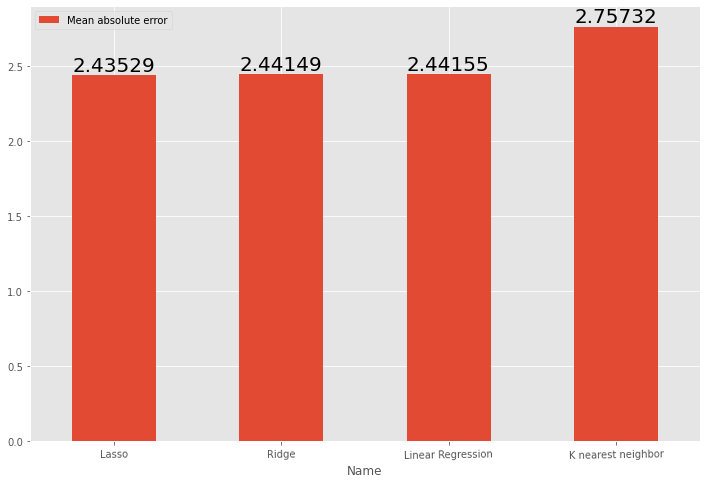

In [12]:
df_lasso = round(lasso_mae, 5)
df_kneighbor = round(kneighbors_mae, 5)
df_linear = round(linear_mae, 5)
df_ridge = round(Ridge_mae, 5)
names = ['Lasso', 'K nearest neighbor', 'Linear Regression', 'Ridge']
values = [df_lasso, df_kneighbor, df_linear, df_ridge]

plt.rcParams['figure.figsize'] = (12,8)
mpl.style.use('ggplot')
df_plt = pd.DataFrame({'Name':names, 'Mean absolute error':values})
df_plt.sort_values('Mean absolute error', ascending = True).plot.bar(x = 'Name', y = 'Mean absolute error', rot = 1)

values.sort()
for index, data in enumerate(values):
    plt.text(x = index-0.25, y = data+0.03 , s = f"{data}", fontdict = dict(fontsize = 20))

Absences and final grade

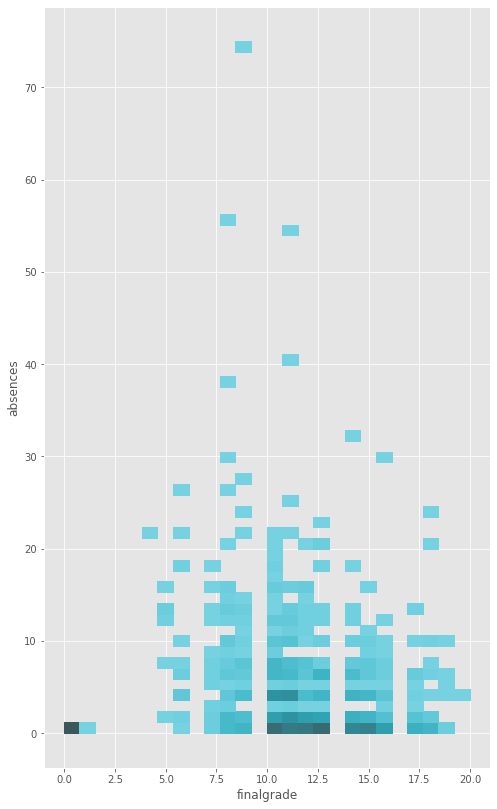

In [13]:
new = df.copy()
sorted_df = new.sort_values(by = "absences")
plt.figure(figsize = (8,14))
plot = sb.histplot(x = 'finalgrade', y = 'absences', data = sorted_df, color = '#8CECFC')
plt.show()

Weekly alcohol consumption and final grade

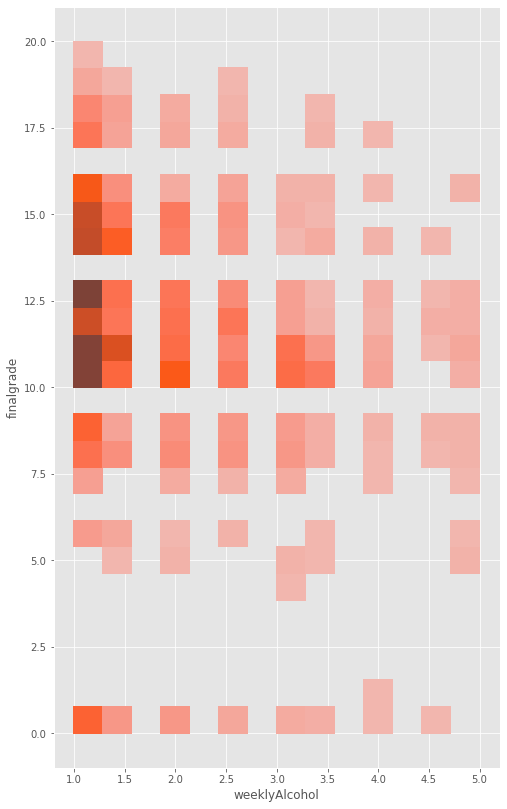

In [14]:
new = df.copy()
sorted_df = new.sort_values(by = "weeklyAlcohol")
plt.figure(figsize = (8,14))
plot = sb.histplot(x = 'weeklyAlcohol', y = 'finalgrade', data = sorted_df, color = '#FD9E8F')
plt.show()

Family relationships and final grade

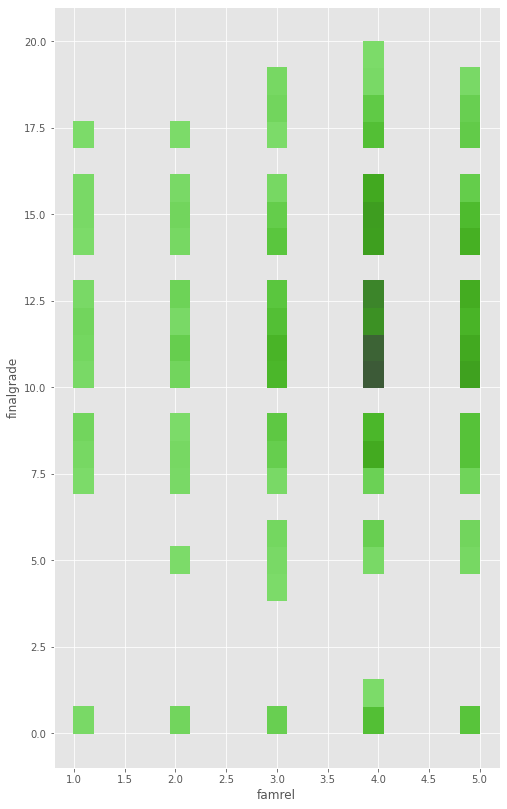

In [15]:
new = df.copy()
sorted_df = new.sort_values(by = "famrel")
plt.figure(figsize = (8,14))
plot = sb.histplot(x = 'famrel', y = 'finalgrade', data = sorted_df, color = '#B2FEA6')
plt.show()

## Finding the most impactful factors for final grade

###### Mean final grade for alcohol consumption rating

In [16]:
df2 = df.copy()
df2 = pd.concat([df.drop('weeklyAlcohol', axis=1), pd.get_dummies(df['weeklyAlcohol'])], axis=1)
df2 = df2.drop(columns=['famrel','absences','famsup','paid'], axis=1)
df2 = df2.rename(columns = {1.0: 'r1',
                           1.5: 'r15',
                           2.0: 'r2',
                           2.5: 'r25',
                           3.0: 'r3',
                           3.5: 'r35',
                           4.0: 'r4',
                           4.5: 'r45',
                           5.0: 'r5'
                           })
means = {
    'r1':round(df2.loc[df2['r1'] == 1,'finalgrade'].mean(),2),
    'r15':round(df2.loc[df2['r15'] == 1,'finalgrade'].mean(),2),
    'r2':round(df2.loc[df2['r2'] == 1,'finalgrade'].mean(),2),
    'r25':round(df2.loc[df2['r25'] == 1,'finalgrade'].mean(),2),
    'r3':round(df2.loc[df2['r3'] == 1,'finalgrade'].mean(),2),
    'r35':round(df2.loc[df2['r35'] == 1,'finalgrade'].mean(),2),
    'r4':round(df2.loc[df2['r4'] == 1,'finalgrade'].mean(),2),
    'r45':round(df2.loc[df2['r45'] == 1,'finalgrade'].mean(),2),
    'r5':round(df2.loc[df2['r5'] == 1,'finalgrade'].mean(),2),
}
print("Final grade by weekly alcohol consumption rating: ")
print(means)

means2 = {
    'lower': round((means['r1']+means['r15']+means['r2']+means['r25'])/4,2),
    'higher': round((means['r3']+means['r35']+means['r4']+means['r45']+means['r5'])/5,2)
}
print("Final grade by weekly alcohol consumption range (lower - 1-2.5/5; higher - 3-5/5): ")
print(means2)

Final grade by weekly alcohol consumption rating: 
{'r1': 11.77, 'r15': 11.77, 'r2': 11.18, 'r25': 11.4, 'r3': 9.88, 'r35': 10.47, 'r4': 10.5, 'r45': 10.0, 'r5': 10.38}
Final grade by weekly alcohol consumption range (lower - 1-2.5/5; higher - 3-5/5): 
{'lower': 11.53, 'higher': 10.25}


Unsurprisingly, the students who rated their weekly alcohol consumption as 1.0/5 had the highest mean final grade: 11.8

However, as a bit of a surprise, the students with the lowest final grade: 9.9 were the ones that rated their weekly alcohol consumption as 3.0/5.

Students who rated their weekly alcohol consumption lower (1-2.5/5) had a mean final grade of 11.53. On the other hand, the students who rated their weekly alcohol consumption higher (3-5/5) had a mean final grade of 10.25. That is a difference of 1.28, which is not as high as we thought.

##### Mean final grade for family relationships rating

In [17]:
df3 = df.copy()
df3 = pd.concat([df.drop('famrel', axis=1), pd.get_dummies(df['famrel'])], axis=1)
df3 = df3.drop(columns=['weeklyAlcohol','absences','famsup','paid'], axis=1)
df3 = df3.rename(columns = {1: 'r1',
                           2: 'r2',
                           3: 'r3',
                           4: 'r4',
                           5: 'r5'
                           })
means = {
    'r1':round(df3.loc[df3['r1'] == 1,'finalgrade'].mean(),2),
    'r2':round(df3.loc[df3['r2'] == 1,'finalgrade'].mean(),2),
    'r3':round(df3.loc[df3['r3'] == 1,'finalgrade'].mean(),2),
    'r4':round(df3.loc[df3['r4'] == 1,'finalgrade'].mean(),2),
    'r5':round(df3.loc[df3['r5'] == 1,'finalgrade'].mean(),2),
}
print("Final grade by family relationships rating: ")
means

means2 = {
    'lower': round((means['r1']+means['r2'])/2,2),
    'higher': round((means['r3']+means['r4']+means['r5'])/3,2)
}
means2
print(means)

Final grade by family relationships rating: 
{'r1': 10.63, 'r2': 10.49, 'r3': 10.97, 'r4': 11.59, 'r5': 11.34}


There is a correlation between family relationship rating and final grade. Those who had a lower family relationships rating of 1-2/5 had a mean final grade of 10.56. Those who had a higher family relationships rating of 4-5/5 had a mean final grade of 11.47.

##### Mean final grade for students who had financial support from family and who did not have financial support from family

In [18]:
df4 = df.loc[df['famsup'] == 1,'finalgrade']
famsup_mean = df4.mean()
df5 = df.loc[df['famsup'] == 0,'finalgrade']
no_famsup_mean = df5.mean()
print('Mean grade with financial support from family: ', round(famsup_mean,2))
print('Mean grade without financial support from family: ', round(no_famsup_mean,2))

Mean grade with financial support from family:  11.38
Mean grade without financial support from family:  11.28


##### Mean final grade for students took paid extra classes and who did not

In [19]:
df6 = df.loc[df['paid'] == 1,'finalgrade']
famsup_mean = df6.mean()
df7 = df.loc[df['paid'] == 0,'finalgrade']
no_famsup_mean = df7.mean()
print('Mean grade with paid extra classes: ', round(famsup_mean,2))
print('Mean grade without paid extra classes: ', round(no_famsup_mean,2))

Mean grade with paid extra classes:  10.97
Mean grade without paid extra classes:  11.44
